# read Gadget snapshot file 

the ICs is output in Gadget format. 

We show how to read it refering to [Paco's tutorial](https://quijote-simulations.readthedocs.io/en/latest/Examples/Reading_snapshots.html). 

In [2]:
import numpy as np
import readgadget
import matplotlib.pyplot as plt

In [17]:
snapshot = '/hscratch/siyizhao/ICs/test/ics_nonlocal_test'

## header

In [24]:
# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0 *np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h) 

print('BoxSize = %.3f Mpc/h'%BoxSize)
print('Total number of particles:',Nall)
print('Masses of the particles:',Masses, 'Msun/h')
print('Omega_m = %.3f'%Omega_m)
print('Omega_L = %.3f'%Omega_l)
print('h = %.3f'%h)
print('redshift = %.3f'%redshift)
print('H(z=%.1f)=%.3f (km/s)/(Mpc/h)'%(redshift,Hubble))

BoxSize = 1200.000 Mpc/h
Total number of particles: [       0 21952000        0        0        0        0]
Masses of the particles: [0.00000000e+00 5.46198929e+12 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] Msun/h
Omega_m = 0.250
Omega_L = 0.750
h = 0.700
redshift = 49.000
H(z=49.0)=17677.882 (km/s)/(Mpc/h)


In [19]:
mass_c = Masses[1]
N_c = Nall[1]
print('Mass of a DM particle = %.3e Msun/h'%mass_c)
print('Number of DM particles = %d'%N_c)

Mass of a DM particle = 5.462e+12 Msun/h
Number of DM particles = 21952000


In [20]:
# we can check the value of Omega_m
rho_crit = 2.775e11 #critical density at z=0 in (Msun/h)/(cMpc/h)^3
estimated_Omega_m = N_c*mass_c/BoxSize**3/rho_crit
print('%.4f should be similar to\n%.4f'%(estimated_Omega_m,Omega_m))

0.2500 should be similar to
0.2500


## particle position, velocity, and ID

In [21]:
ptype = [1] #DM is 1, neutrinos is [2]
pos   = readgadget.read_block(snapshot, "POS ", ptype) #positions in Mpc/h
vel   = readgadget.read_block(snapshot, "VEL ", ptype)     #peculiar velocities in km/s
ids   = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

`readgadget` can automatically deal with the multiple files, as it knows and loops with (although I don't know how...)

In [23]:
filenum = header.filenum
print('file number = %i '%filenum)

file number = 4 


In [29]:
print('%.3f < X  < %.3f Mpc/h'%(np.min(pos[:,0]), np.max(pos[:,0])))
print('%.3f < Y  < %.3f Mpc/h'%(np.min(pos[:,1]), np.max(pos[:,1])))
print('%.3f < Z  < %.3f Mpc/h'%(np.min(pos[:,2]), np.max(pos[:,2])))
print('%.3f < Vx < %.3f km/s'%(np.min(vel[:,0]), np.max(vel[:,0])))
print('%.3f < Vy < %.3f km/s'%(np.min(vel[:,1]), np.max(vel[:,1])))
print('%.3f < Vz < %.3f km/s'%(np.min(vel[:,2]), np.max(vel[:,2])))
print('%d < IDs < %d'%(np.min(ids), np.max(ids)))

0.000 < X  < 1200.000 Mpc/h
0.000 < Y  < 1200.000 Mpc/h
0.000 < Z  < 1200.000 Mpc/h
-283.398 < Vx < 287.633 km/s
-273.527 < Vy < 287.191 km/s
-284.374 < Vz < 275.829 km/s
0 < IDs < 21951999


In [30]:
# lets consider the particle number 10
print('position =',pos[10],'Mpc/h')
print('velocity =',vel[10],'km/s')
print('ID =',ids[10])

position = [1.5531056e-01 1.1996548e+03 4.2712940e+01] Mpc/h
velocity = [  55.03945 -121.75041  -50.89286] km/s
ID = 10


plot the velocity distribution of the particles.

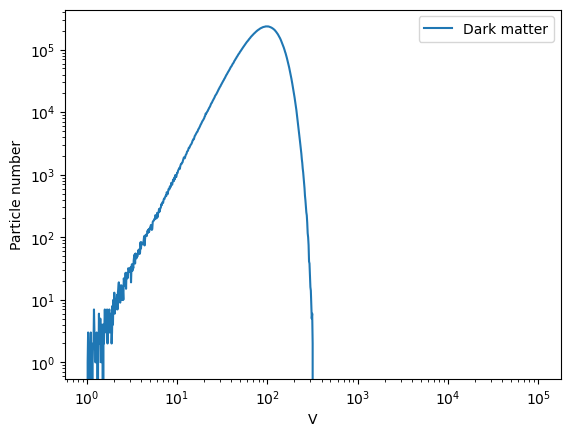

In [34]:
Vc = np.sqrt(vel[:,0]**2 + vel[:,1]**2 + vel[:,2]**2)
bins_histo = np.logspace(0,5,1000)
histo_Vc, edges = np.histogram(Vc, bins_histo)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('V')
plt.ylabel('Particle number')
plt.plot(edges[1:], histo_Vc)
plt.legend(['Dark matter'])
plt.show()